# Cosmic Ray Proton Spectrum Fitting

In [1]:
from pylab import *
from scipy.optimize import minimize 
from scipy import interpolate

## PAMELA data from Adriani et al., Science 332, 69 (2011)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<R>$ (GV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

### * *More recent data in Adriani et al., ApJ 765, 91 (2013)*

In [2]:
Z = 1
data_PAMELA_H = np.genfromtxt("Data/PAMELA_H_data.txt")
R_PAMELA = data_PAMELA_H[:,1]
E_PAMELA = R_PAMELA * Z
flux_R_PAMELA = data_PAMELA_H[:,3]
flux_PAMELA = flux_R_PAMELA / Z
error_PAMELA_stat = data_PAMELA_H[:,4]/Z; error_PAMELA_syst = data_PAMELA_H[:,5]/Z
error_PAMELA = np.sqrt(error_PAMELA_stat**2 + error_PAMELA_syst**2)

## AMS02 data from Aguilar et al., PRL 114, 171103 (2015)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<R>$ (GV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

### * *More recent data in Aguilar et al., PhR 894, 1 (2021)*

In [3]:
Z = 1
data_AMS02_H = np.genfromtxt("Data/AMS02_H_data.txt")
R_AMS02 = data_AMS02_H[:,1]
E_AMS02 = R_AMS02 * Z
flux_R_AMS02 = data_AMS02_H[:,3]
flux_AMS02 = flux_R_AMS02 / Z
error_AMS02_stat = data_AMS02_H[:,4]/Z; error_AMS02_syst = data_AMS02_H[:,5]/Z
error_AMS02 = np.sqrt(error_AMS02_stat**2 + error_AMS02_syst**2)

## DAMPE data from An et al., SciA 5, eaax3793 (2019)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Ek>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [4]:
data_DAMPE_H = np.genfromtxt("Data/DAMPE_H_data.txt")
E_DAMPE = data_DAMPE_H[:,1]
flux_DAMPE = data_DAMPE_H[:,3]
error_DAMPE = data_DAMPE_H[:,4]

## CALET data from Adriani et al., PhRvL 122, 181102 (2019)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Ek>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err (-) $\quad$ [6] Syst Err (+)

### * *More recent data in Adriani et al., PhRvL 129, 101102 (2022)*

In [5]:
Z = 1
data_CALET_H = np.genfromtxt("Data/CALET_H_data.txt")
R_CALET = data_CALET_H[:,1]
E_CALET = R_CALET * Z
flux_R_CALET = data_CALET_H[:,3]
flux_CALET = flux_R_CALET / Z
error_CALET = data_CALET_H[:,4]/Z

## CREAM data from Yoon et al., ApJ 839, 5 (2017)
### Data sets colums
#### [0] Quantity $\quad$ [1] $<Ek/n>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek/n bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err (-) $\quad$ [5] Stat Err (+) $\quad$ [6] Syst Err

In [6]:
n = 1
data_CREAM_H = np.genfromtxt("Data/CREAM_H_data.txt")
E_CREAM = data_CREAM_H[:,1] * n
flux_CREAM = data_CREAM_H[:,3] / n
error_CREAM_low = data_CREAM_H[:,4]/n; error_CREAM_up = data_CREAM_H[:,5]/n

## ATIC data from Panov et al., Bull. Russian Acad. Sci. 73, 564 (2009)
### Data sets colums
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [7]:
data_ATIC_H = np.genfromtxt("Data/ATIC_H_data.txt")
E_ATIC = data_ATIC_H[:,1]
flux_ATIC = data_ATIC_H[:,3]
error_ATIC = data_ATIC_H[:,4]

## NUCLEON data from Grebenyuk et al., AdSpR 64, 2546 (2019)
### Data sets colums
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [8]:
data_NUCLEON_H = np.genfromtxt("Data/NUCLEON_H_data.txt")
E_NUCLEON = data_NUCLEON_H[:,1]
flux_NUCLEON = data_NUCLEON_H[:,3]
error_NUCLEON = data_NUCLEON_H[:,4]

## Model by (Lipari $\&$ Vernetto, 2019) for hardening and softening of proton spectrum

In [9]:
def Phi_twobreaks(E, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2):
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    return K * (E/E0)**(-alpha1) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1) * (1 + (E/Eb2)**(1/omega2))**(-delta2 * omega2)

In [10]:
def Phi_onebreak(E, K, E0, alpha1, alpha2, omega1, Eb1):
    delta1 = alpha2 - alpha1
    phi = K * (E/E0)**(-alpha1) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1)
    return phi

## $\chi^2$-minimzation fit
### For each experiment individually $\chi^2_j(K, E_0, \alpha_1, \alpha_2, \alpha_3, E_b, \omega, E'_b, \omega') = \sum_i \frac{\left(\phi_j(E_i)-\phi(E_i; K, E_0, \alpha_1, \alpha_2, \alpha_3, E_b, \omega, E'_b, \omega')\right)^2}{\sigma_{i,j}^2}$

### PAMELA

In [31]:
E = E_PAMELA
Flux = flux_PAMELA
Sigma = 2*error_PAMELA

index = np.where(np.logical_and(E>=8e1, E<=1e5))
E = E[index]; Flux = Flux[index]; Sigma = Sigma[index]

# Check number of degrees of freedom
print('# data points used:', 16)
print('# actual data points:', len(Flux))

def Chi_PAMELA(parameters):
    K, alpha1, alpha2, omega1, Eb1 = parameters
    Phi_model = Phi_onebreak(E, K, 0.1 * 1e3, alpha1, alpha2, omega1, Eb1)
    return sum( (Phi_model - Flux)**2 / Sigma**2 )

# data points used: 16
# actual data points: 16


In [32]:
# Initial guess
alpha1 = 2.85
alpha2 = 2.67
Eb1 = 0.232 * 1e3 #GeV
omega1 = 0.25
K = 4.60 * 10**(-2) #(GeV m2 s sr)-1
E0 = 0.1 * 1e3 #GeV

# Minimization of chi^2
output = minimize(Chi_PAMELA, (K, alpha1, alpha2, omega1, Eb1), method='L-BFGS-B')
best_fit_values = output['x']

# Best fit values
print('LIPARI & VERNETTO BEST FIT VALUES:')
print('K:', round(K,3)); 
print('alpha_1:', round(alpha1,3)); print('alpha_2:', round(alpha2,3))
print('omega:', round(omega1,3))
print('E_b:', round(Eb1,3), 'GeV')
print('')

K, alpha1, alpha2, omega1, Eb1 = best_fit_values
print('MY BEST FIT VALUES:')
print('K:', round(best_fit_values[0],3))
print('alpha_1:', round(best_fit_values[1],3)); print('alpha_2:', round(best_fit_values[2],3))
print('omega:', round(best_fit_values[3],3))
print('E_b:', round(best_fit_values[4],3), 'GeV')
print('')

min_chi = Chi_PAMELA(best_fit_values)
print('chi^2_min:', round(min_chi,7))

LIPARI & VERNETTO BEST FIT VALUES:
K: 0.046
alpha_1: 2.85
alpha_2: 2.67
omega: 0.25
E_b: 232.0 GeV

MY BEST FIT VALUES:
K: 0.048
alpha_1: 2.868
alpha_2: 2.691
omega: 0.002
E_b: 232.002 GeV

chi^2_min: 0.3728234


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_31905/1974164448.py:3: RuntimeWarning: overflow encountered in power
  phi = K * (E/E0)**(-alpha1) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1)


In [33]:
def Errors_PAMELA(n):
    
    alpha1 = 2.85
    alpha2 = 2.67
    Eb1 = 0.232 * 1e3 #GeV
    omega1 = 0.25
    K = 4.60 * 10**(-2) #(GeV m2 s sr)-1
    E0 = 0.1 * 1e3 #GeV
    output = minimize(Chi_PAMELA, (K, alpha1, alpha2, omega1, Eb1), method='L-BFGS-B')
    best_fit_values = output['x']
    
    scan = np.zeros(500)
    fit = best_fit_values[n]
    for i in range(0, 250):
        scan[i] = fit - (fit / 1000)*i
    for j in range(250, 500):
        scan[j] = fit + (fit / 1000)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_PAMELA(best_fit_values)
    chi_sqrd = np.zeros(500)
    for k in range(0, 500):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_PAMELA(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Find value for which chi^2 is equal to one
yToFind = 5.89

scan, fit, chi_sqrd = Errors_PAMELA(0)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('K'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_PAMELA(1)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha1'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_PAMELA(2)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha2'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_PAMELA(4)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('Eb1'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

K
Lower error: 0.0028824514578592725
Upper error: 0.002831452861960501
alpha1
Lower error: 0.10045580721041825
Upper error: 0.11677824552297
alpha2
Lower error: 0.19783649265008751
Upper error: 0.2497818912167742
Eb1


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_31905/1974164448.py:3: RuntimeWarning: overflow encountered in power
  phi = K * (E/E0)**(-alpha1) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1)


IndexError: index 0 is out of bounds for axis 0 with size 0

### AMS02

In [34]:
E = E_AMS02
Flux = flux_AMS02
Sigma = 2*error_AMS02

index = np.where(np.logical_and(E>=4.5e1, E<=1e5))
E = E[index]; Flux = Flux[index]; Sigma = Sigma[index]

# Check number of degrees of freedom
print('# data points used:', 31)
print('# actual data points:', len(Flux))

def Chi_AMS02(parameters):
    K, alpha1, alpha2, omega1, Eb1 = parameters
    Phi_model = Phi_onebreak(E, K, 0.1 * 1e3, alpha1, alpha2, omega1, Eb1)
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

# data points used: 31
# actual data points: 31


In [35]:
# Initial guess
alpha1 = 2.849
alpha2 = 2.716
Eb1 = 0.336 * 1e3 #GeV
omega1 = 0.04
K = 4.42 * 10**(-2) #(GeV m2 s sr)-1
E0 = 0.1 * 1e3 #GeV

# Minimization of chi^2
output = minimize(Chi_AMS02, (K, alpha1, alpha2, omega1, Eb1), method='L-BFGS-B')
best_fit_values = output['x']

# Best fit values
print('LIPARI & VERNETTO BEST FIT VALUES:')
print('K:', round(K,4)); 
print('alpha_1:', round(alpha1,3)); print('alpha_2:', round(alpha2,3))
print('omega:', round(omega1,3))
print('E_b:', round(Eb1,4), 'GeV')
print('')

K, alpha1, alpha2, omega1, Eb1 = best_fit_values
print('MY BEST FIT VALUES:')
print('K:', round(best_fit_values[0],3))
print('alpha_1:', round(best_fit_values[1],3)); print('alpha_2:', round(best_fit_values[2],3))
print('omega:', round(best_fit_values[3],3))
print('E_b:', round(best_fit_values[4],3), 'GeV')
print('')

min_chi = Chi_AMS02(best_fit_values)
print('chi^2_min:', round(min_chi,7))

LIPARI & VERNETTO BEST FIT VALUES:
K: 0.0442
alpha_1: 2.849
alpha_2: 2.716
omega: 0.04
E_b: 336.0 GeV

MY BEST FIT VALUES:
K: 0.045
alpha_1: 2.817
alpha_2: 2.724
omega: 0.003
E_b: 336.001 GeV

chi^2_min: 0.3997239


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_31905/1974164448.py:3: RuntimeWarning: overflow encountered in power
  phi = K * (E/E0)**(-alpha1) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1)


In [36]:
def Errors_AMS02(n):
    
    alpha1 = 2.849
    alpha2 = 2.716
    Eb1 = 0.336 * 1e3 #GeV
    omega1 = 0.04
    K = 4.42 * 10**(-2) #(GeV m2 s sr)-1
    E0 = 0.1 * 1e3 #GeV
    output = minimize(Chi_AMS02, (K, alpha1, alpha2, omega1, Eb1), method='L-BFGS-B')
    best_fit_values = output['x']
    
    scan = np.zeros(500)
    fit = best_fit_values[n]
    for i in range(0, 250):
        scan[i] = fit - (fit / 1000)*i
    for j in range(250, 500):
        scan[j] = fit + (fit / 1000)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_AMS02(best_fit_values)
    chi_sqrd = np.zeros(500)
    for k in range(0, 500):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_AMS02(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Find value for which chi^2 is equal to one
yToFind = 5.89

scan, fit, chi_sqrd = Errors_AMS02(0)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('K'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_AMS02(1)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha1'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_AMS02(2)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha2'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_AMS02(4)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('Eb1'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

K
Lower error: 0.0006400049044795672
Upper error: 0.0006400554115618823
alpha1
Lower error: 0.02345031566311606
Upper error: 0.025980969401536047
alpha2
Lower error: 0.09426513188396379
Upper error: 0.10940072154111702
Eb1


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_31905/1974164448.py:3: RuntimeWarning: overflow encountered in power
  phi = K * (E/E0)**(-alpha1) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1)


IndexError: index 0 is out of bounds for axis 0 with size 0

### ATIC

In [37]:
E = E_ATIC
Flux = flux_ATIC
Sigma = 2*error_ATIC

index = np.where(np.logical_and(E>=4.5e1, E<=1e5))
E = E[index]; Flux = Flux[index]; Sigma = Sigma[index]

# Check number of degrees of freedom
print('# data points used:', 15)
print('# actual data points:', len(Flux))

def Chi_ATIC(parameters):
    K, alpha1, alpha2, omega1, Eb1 = parameters
    Phi_model = Phi_onebreak(E, K, 0.1 * 1e3, alpha1, alpha2, omega1, Eb1)
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

# data points used: 15
# actual data points: 15


In [38]:
# Initial guess
alpha1 = 2.79
alpha2 = 2.62
Eb1 = 0.275 * 1e3 #GeV
omega1 = 0.34
K = 4.4 * 10**(-2) #(GeV m2 s sr)-1
E0 = 0.1 * 1e3 #GeV

# Minimization of chi^2
output = minimize(Chi_ATIC, (K, alpha1, alpha2, omega1, Eb1), method='L-BFGS-B')
best_fit_values = output['x']

# Best fit values
print('LIPARI & VERNETTO BEST FIT VALUES:')
print('K:', round(K,4)); 
print('alpha_1:', round(alpha1,3)); print('alpha_2:', round(alpha2,3))
print('omega:', round(omega1,3))
print('E_b:', round(Eb1,4), 'GeV')
print('')

K, alpha1, alpha2, omega1, Eb1 = best_fit_values
print('MY BEST FIT VALUES:')
print('K:', round(best_fit_values[0],3))
print('alpha_1:', round(best_fit_values[1],3)); print('alpha_2:', round(best_fit_values[2],3))
print('omega:', round(best_fit_values[3],3))
print('E_b:', round(best_fit_values[4],3), 'GeV')
print('')

min_chi = Chi_ATIC(best_fit_values)
print('chi^2_min:', round(min_chi,7))

LIPARI & VERNETTO BEST FIT VALUES:
K: 0.044
alpha_1: 2.79
alpha_2: 2.62
omega: 0.34
E_b: 275.0 GeV

MY BEST FIT VALUES:
K: 0.044
alpha_1: 2.793
alpha_2: 2.6
omega: 0.544
E_b: 274.999 GeV

chi^2_min: 1.8145301


In [39]:
def Errors_ATIC(n):
    
    alpha1 = 2.79
    alpha2 = 2.62
    Eb1 = 0.275 * 1e3 #GeV
    omega1 = 0.34
    K = 4.4 * 10**(-2) #(GeV m2 s sr)-1
    E0 = 0.1 * 1e3 #GeV
    output = minimize(Chi_ATIC, (K, alpha1, alpha2, omega1, Eb1), method='L-BFGS-B')
    best_fit_values = output['x']
    
    scan = np.zeros(500)
    fit = best_fit_values[n]
    for i in range(0, 250):
        scan[i] = fit - (fit / 1000)*i
    for j in range(250, 500):
        scan[j] = fit + (fit / 1000)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_ATIC(best_fit_values)
    chi_sqrd = np.zeros(500)
    for k in range(0, 500):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_ATIC(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Find value for which chi^2 is equal to one
yToFind = 5.89

scan, fit, chi_sqrd = Errors_ATIC(0)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('K'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_ATIC(1)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha1'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_ATIC(2)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha2'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_ATIC(4)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('Eb1'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

K
Lower error: 0.0005496671664499755
Upper error: 0.0005496776352367921
alpha1
Lower error: 0.028105477997540262
Upper error: 0.030341535682897103
alpha2
Lower error: 0.02855938181230888
Upper error: 0.03538312858825554
Eb1
Lower error: 46.03974456691756
Upper error: 59.86238734687362


### CREAM

In [40]:
E = E_CREAM
Flux = flux_CREAM
Sigma = error_CREAM_low + error_CREAM_up

index = np.where(np.logical_and(E>=1e2, E<=3e5))
E = E[index]; Flux = Flux[index]; Sigma = Sigma[index]

# Check number of degrees of freedom
print('# data points used:', 12)
print('# actual data points:', len(Flux))

def Chi_CREAM(parameters):
    K, alpha2, alpha3, omega2, Eb2 = parameters
    Phi_model = Phi_onebreak(E, K, 0.1 * 1e3, alpha2, alpha3, omega2, Eb2)
    return sum( (Phi_model - Flux)**2 / Sigma**2 )

# data points used: 12
# actual data points: 12


In [41]:
# Initial guess
alpha2 = 2.58
alpha3 = 2.84
Eb2 = 16 * 1e3 #GeV
omega2 = 0.5
K = 1.22 * 10**(-5) #(GeV m2 s sr)-1
E0 = 2 * 1e3 #GeV

# Minimization of chi^2
output = minimize(Chi_CREAM, (K, alpha2, alpha3, omega2, Eb2), method='L-BFGS-B')
best_fit_values = output['x']

# Best fit values
print('LIPARI & VERNETTO BEST FIT VALUES:')
print('K:', round(K,7)); 
print('alpha_2:', round(alpha2,3)); print('alpha_3:', round(alpha3,3))
print('omega:', round(omega2,3))
print('E_b:', round(Eb2,4), 'GeV')
print('')

K, alpha1, alpha2, omega1, Eb1 = best_fit_values
print('MY BEST FIT VALUES:')
print('K:', round(best_fit_values[0],7))
print('alpha_2:', round(best_fit_values[1],3)); print('alpha_3:', round(best_fit_values[2],3))
print('omega:', round(best_fit_values[3],3))
print('E_b2:', round(best_fit_values[4],3), 'GeV')
print('')

min_chi = Chi_CREAM(best_fit_values)
print('chi^2_min:', round(min_chi,7))

LIPARI & VERNETTO BEST FIT VALUES:
K: 1.22e-05
alpha_2: 2.58
alpha_3: 2.84
omega: 0.5
E_b: 16000.0 GeV

MY BEST FIT VALUES:
K: 0.0278328
alpha_2: 2.582
alpha_3: 2.846
omega: 0.11
E_b2: 16000.0 GeV

chi^2_min: 0.4101035


In [42]:
def Errors_CREAM(n):
    
    alpha1 = 2.79
    alpha2 = 2.62
    Eb1 = 0.275 * 1e3 #GeV
    omega1 = 0.34
    K = 4.4 * 10**(-2) #(GeV m2 s sr)-1
    E0 = 0.1 * 1e3 #GeV
    output = minimize(Chi_CREAM, (K, alpha1, alpha2, omega1, Eb1), method='L-BFGS-B')
    best_fit_values = output['x']
    
    scan = np.zeros(500)
    fit = best_fit_values[n]
    for i in range(0, 250):
        scan[i] = fit - (fit / 1000)*i
    for j in range(250, 500):
        scan[j] = fit + (fit / 1000)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_CREAM(best_fit_values)
    chi_sqrd = np.zeros(500)
    for k in range(0, 500):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_CREAM(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Find value for which chi^2 is equal to one
yToFind = 5.89

scan, fit, chi_sqrd = Errors_CREAM(0)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('K'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_CREAM(1)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha1'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_CREAM(2)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha2'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_CREAM(4)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('Eb1'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

K
Lower error: 0.0007691748239075161
Upper error: 0.0007691829367937053
alpha1
Lower error: 0.02236389097380842
Upper error: 0.025021233605095006
alpha2
Lower error: 0.007513615465779111
Upper error: 0.012650403116650555
Eb1
Lower error: 34.962520935534
Upper error: 41.226892356752955


### CALET

In [43]:
E = E_CALET
Flux = flux_CALET
Sigma = 2*error_CALET

index = np.where(np.logical_and(E>=4.5e1, E<=1e5))
E = E[index]; Flux = Flux[index]; Sigma = Sigma[index]

# Check number of degrees of freedom
print('# data points used:', 23)
print('# actual data points:', len(Flux))

def Chi_CALET(parameters):
    K, alpha1, alpha2, omega1, Eb1 = parameters
    Phi_model = Phi_onebreak(E, K, 0.1 * 1e3, alpha1, alpha2, omega1, Eb1)
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

# data points used: 23
# actual data points: 23


In [44]:
# Initial guess
alpha1 = 2.81
alpha2 = 2.55
Eb1 = 0.605 * 1e3 #GeV
omega1 = 0.25
K = 4.34 * 10**(-2) #(GeV m2 s sr)-1
E0 = 0.1 * 1e3 #GeV

# Minimization of chi^2
output = minimize(Chi_CALET, (K, alpha1, alpha2, omega1, Eb1), method='L-BFGS-B')
best_fit_values = output['x']

# Best fit values
print('LIPARI & VERNETTO BEST FIT VALUES:')
print('K:', round(K,4)); 
print('alpha_1:', round(alpha1,3)); print('alpha_2:', round(alpha2,3))
print('omega:', round(omega1,3))
print('E_b:', round(Eb1,4), 'GeV')
print('')

K, alpha1, alpha2, omega1, Eb1 = best_fit_values
print('MY BEST FIT VALUES:')
print('K:', round(best_fit_values[0],3))
print('alpha_1:', round(best_fit_values[1],3)); print('alpha_2:', round(best_fit_values[2],3))
print('omega:', round(best_fit_values[3],3))
print('E_b:', round(best_fit_values[4],3), 'GeV')
print('')

min_chi = Chi_CALET(best_fit_values)
print('chi^2_min:', round(min_chi,7))

LIPARI & VERNETTO BEST FIT VALUES:
K: 0.0434
alpha_1: 2.81
alpha_2: 2.55
omega: 0.25
E_b: 605.0 GeV

MY BEST FIT VALUES:
K: 0.043
alpha_1: 2.812
alpha_2: 2.552
omega: 0.258
E_b: 605.0 GeV

chi^2_min: 4.3522024


In [45]:
def Errors_CALET(n):
    
    alpha1 = 2.81
    alpha2 = 2.55
    Eb1 = 0.605 * 1e3 #GeV
    omega1 = 0.25
    K = 4.34 * 10**(-2) #(GeV m2 s sr)-1
    E0 = 0.1 * 1e3 #GeV
    output = minimize(Chi_CALET, (K, alpha1, alpha2, omega1, Eb1), method='L-BFGS-B')
    best_fit_values = output['x']
    
    scan = np.zeros(500)
    fit = best_fit_values[n]
    for i in range(0, 250):
        scan[i] = fit - (fit / 1000)*i
    for j in range(250, 500):
        scan[j] = fit + (fit / 1000)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_CALET(best_fit_values)
    chi_sqrd = np.zeros(500)
    for k in range(0, 500):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_CALET(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Find value for which chi^2 is equal to one
yToFind = 5.89

scan, fit, chi_sqrd = Errors_CALET(0)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('K'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_CALET(1)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha1'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_CALET(2)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha2'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

scan, fit, chi_sqrd = Errors_CALET(3)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('omega1'); print('Upper error:', scan_interval[0] - fit)

scan, fit, chi_sqrd = Errors_CALET(4)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('Eb1'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

K
Lower error: 0.00034671386744615507
Upper error: 0.00034672395665480416
alpha1
Lower error: 0.00610646126788561
Upper error: 0.0076233514291015325
alpha2
Lower error: 0.01809658113440271
Upper error: 0.021577903275902255
omega1
Upper error: 0.07065775062112656
Eb1
Lower error: 40.059756220241866
Upper error: 46.30319061784212


### DAMPE

In [46]:
E = E_DAMPE
Flux = flux_DAMPE
Sigma = 2*error_DAMPE

index = np.where(np.logical_and(E>=4.5e1, E<=1e5))
E = E[index]; Flux = Flux[index]; Sigma = Sigma[index]

# Check number of degrees of freedom
print('# data points used:', 17)
print('# actual data points:', len(Flux))

def Chi_DAMPE(parameters):
    K, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2 = parameters
    Phi_model = Phi_twobreaks(E, K, 2 * 1e3, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2)
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

# data points used: 17
# actual data points: 17


In [47]:
# Initial guess
alpha1 = 2.75
alpha2 = 2.58
alpha3 = 2.86
Eb2 = 0.574 * 1e3 #GeV
Eb2 = 12.8 * 1e3 #GeV
omega1 = 0.35
omega2 = 0.37
K = 1.15 * 10**(-5) #(GeV m2 s sr)-1
E0 = 2 * 1e3 #GeV

# Minimization of chi^2
output = minimize(Chi_DAMPE, (K, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2), method='L-BFGS-B')
best_fit_values = output['x']

# Best fit values
print('LIPARI & VERNETTO BEST FIT VALUES:')
print('K:', round(K,7)); 
print('alpha_1:', round(alpha1,3)); print('alpha_2:', round(alpha2,3)); print('alpha_3:', round(alpha3,3))
print('omega:', round(omega1,3)); print('omega2:', round(omega2,3))
print('E_b:', round(Eb1,4), 'GeV'), print('E_b2:', round(Eb2,4), 'GeV')
print('')

K, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2 = best_fit_values
print('MY BEST FIT VALUES:')
print('K:', round(best_fit_values[0],7))
print('alpha_1:', round(best_fit_values[1],3)); print('alpha_2:', round(best_fit_values[2],3)); print('alpha_3:', round(best_fit_values[3],3))
print('omega1:', round(best_fit_values[4],3)); print('omega2:', round(best_fit_values[5],3))
print('E_b1:', round(best_fit_values[6],3), 'GeV'); print('E_b2:', round(best_fit_values[7],3), 'GeV')
print('')

min_chi = Chi_DAMPE(best_fit_values)
print('chi^2_min:', round(min_chi,7))

LIPARI & VERNETTO BEST FIT VALUES:
K: 1.15e-05
alpha_1: 2.75
alpha_2: 2.58
alpha_3: 2.86
omega: 0.35
omega2: 0.37
E_b: 605.0 GeV
E_b2: 12800.0 GeV

MY BEST FIT VALUES:
K: 1.15e-05
alpha_1: 2.75
alpha_2: 2.58
alpha_3: 2.86
omega1: 0.35
omega2: 0.37
E_b1: 605.0 GeV
E_b2: 12800.0 GeV

chi^2_min: inf


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_31905/3710235381.py:15: RuntimeWarning: divide by zero encountered in divide
  return sum( (Phi_model - Flux)**2 / Sigma**2 )


### NUCLEON

In [48]:
E = E_NUCLEON
Flux = flux_NUCLEON
Sigma = 2*error_NUCLEON

index = np.where(np.logical_and(E>=1e2, E<=1e5))
E = E[index]; Flux = Flux[index]; Sigma = Sigma[index]

# Check number of degrees of freedom
print('# data points used:', 11)
print('# actual data points:', len(Flux))

def Chi_NUCLEON(parameters):
    K, alpha2, alpha3, omega2, Eb2 = parameters
    Phi_model = Phi_onebreak(E, K, 2 * 1e3, alpha2, alpha3, omega2, Eb2)
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

# data points used: 11
# actual data points: 6


In [49]:
# Initial guess
alpha2 = 2.44
alpha3 = 2.86
Eb2 = 9.5 * 1e3 #GeV
omega2 = 0.24
K = 1.26 * 10**(-5) #(GeV m2 s sr)-1
E0 = 2 * 1e3 #GeV

# Minimization of chi^2
output = minimize(Chi_NUCLEON, (K, alpha2, alpha3, omega2, Eb2), method='L-BFGS-B')
best_fit_values = output['x']

# Best fit values
print('LIPARI & VERNETTO BEST FIT VALUES:')
print('K:', round(K,7)); 
print('alpha_1:', round(alpha2,3)); print('alpha_2:', round(alpha3,3))
print('omega:', round(omega2,3))
print('E_b:', round(Eb2,4), 'GeV')
print('')

K, alpha2, alpha3, omega2, Eb2 = best_fit_values
print('MY BEST FIT VALUES:')
print('K:', round(best_fit_values[0],3))
print('alpha_1:', round(best_fit_values[1],3)); print('alpha_2:', round(best_fit_values[2],3))
print('omega:', round(best_fit_values[3],3))
print('E_b:', round(best_fit_values[4],3), 'GeV')
print('')

min_chi = Chi_NUCLEON(best_fit_values)
print('chi^2_min:', round(min_chi,7))

LIPARI & VERNETTO BEST FIT VALUES:
K: 1.26e-05
alpha_1: 2.44
alpha_2: 2.86
omega: 0.24
E_b: 9500.0 GeV

MY BEST FIT VALUES:
K: 0.0
alpha_1: 2.416
alpha_2: 2.628
omega: 0.296
E_b: 9500.0 GeV

chi^2_min: 0.3089686


## Combined fit using all detectors

In [282]:
E = np.append(np.append(np.append(np.append(np.append(np.append(E_PAMELA, E_AMS02), E_DAMPE), E_CALET), E_CREAM), E_ATIC), E_NUCLEON)
Flux = np.append(np.append(np.append(np.append(np.append(np.append(flux_PAMELA, flux_AMS02), flux_DAMPE), flux_CALET), flux_CREAM), flux_ATIC), flux_NUCLEON)
Sigma = np.append(np.append(np.append(np.append(np.append(np.append(2*error_PAMELA, 2*error_AMS02), 2*error_DAMPE), error_CALET_low+error_CALET_up), error_CREAM_low+error_CREAM_up), 2*error_ATIC), 2*error_NUCLEON)

index = np.where(np.logical_and(E>=1e2, E<=1e5))

E = E[index]
Flux = Flux[index]
Sigma = Sigma[index]

def Chi(parameters):
    K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2 = parameters
    Phi_model = Phi_Lipari(E, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2)
    return sum( (Phi_model - Flux)**2 / Sigma**2) / (len(Flux) - len(parameters))

In [283]:
# Best fit value 

parameters = 4.40 * 10**(-2), 0.1 * 1e3, 2.80, 2.57, 2.87, 0.27, 0.35, 0.67 * 1e3, 16 * 1e3
Chi(parameters)

1.368925749049401

In [310]:
# Initial guess
alpha1 = 2.80
alpha2 = 2.57
alpha3 = 2.87
Eb1 = 0.67 * 1e3
omega1 = 0.27
Eb2 = 16 * 1e3
omega2 = 0.35
K = 4.40 * 10**(-2)
E0 = 0.1 * 1e3

print('LIPARI & VERNETTO BEST FIT VALUES:')
print('K:', round(K,3)); print('E_0:', round(E0,3), 'GeV'); print('alpha_1:', round(alpha1,3))
print('alpha_2:', round(alpha2,3)); print('alpha_3:', round(alpha3,3)); print('omega:', round(omega1,3))
print('omega_primed:', round(omega2,3)); print('E_b:', round(Eb1,3), 'GeV'); print('E_b_primed:', round(Eb2,3), 'GeV')
print('')

# Minimization of chi^2
output = minimize(Chi, (K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2), method='L-BFGS-B')
best_fit_values = output['x']

# Best fit values
K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2 = best_fit_values
print('MY BEST FIT VALUES:')
print('K:', round(best_fit_values[0],3)); print('E_0:', round(best_fit_values[1],3), 'GeV'); print('alpha_1:', round(best_fit_values[2],3))
print('alpha_2:', round(best_fit_values[3],3)); print('alpha_3:', round(best_fit_values[4],3)); print('omega:', round(best_fit_values[5],3))
print('omega_primed:', round(best_fit_values[6],3)); print('E_b:', round(best_fit_values[7],3), 'GeV'); print('E_b_primed:', round(best_fit_values[8],3), 'GeV')

LIPARI & VERNETTO BEST FIT VALUES:
K: 0.044
E_0: 100.0 GeV
alpha_1: 2.8
alpha_2: 2.57
alpha_3: 2.87
omega: 0.27
omega_primed: 0.35
E_b: 670.0 GeV
E_b_primed: 16000.0 GeV

MY BEST FIT VALUES:
K: 0.033
E_0: 100.001 GeV
alpha_1: 2.916
alpha_2: 2.466
alpha_3: 2.781
omega: 2.038
omega_primed: 0.016
E_b: 669.999 GeV
E_b_primed: 16000.0 GeV


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_94199/2483709905.py:4: RuntimeWarning: overflow encountered in power
  return K * (E/E0)**(-alpha1) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1) * (1 + (E/Eb2)**(1/omega2))**(-delta2 * omega2)


Text(0.5, 1.0, 'All detectors')

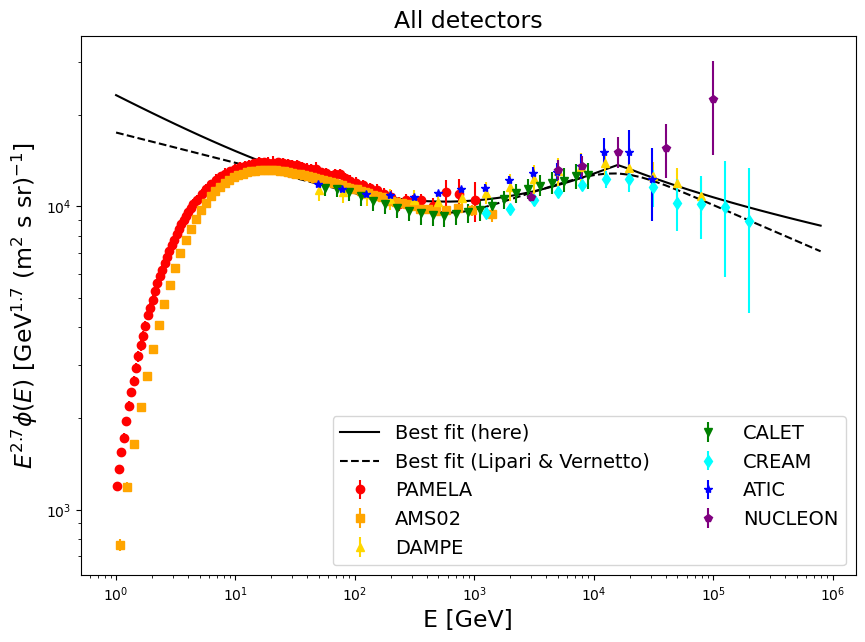

In [280]:
logE = np.arange(0,6,0.1)
E = 10**logE
Phi_us = Phi_Lipari(E, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2)

plt.figure(figsize=(10, 7))
plt.plot(E, Phi_us* E**2.7, color='black', label='Best fit (here)')
plt.plot(E, Phi_all* E**2.7, '--', color='black', label='Best fit (Lipari & Vernetto)')
plt.errorbar(E_PAMELA, flux_PAMELA * E_PAMELA**2.7, yerr=error_PAMELA * E_PAMELA**2.7, fmt='o', color='red', label='PAMELA')
plt.errorbar(E_AMS02, flux_AMS02 * E_AMS02**2.7, yerr=error_AMS02 * E_AMS02**2.7, fmt='s', color='orange', label='AMS02')
plt.errorbar(E_DAMPE, flux_DAMPE * E_DAMPE**2.7, yerr=error_DAMPE * E_DAMPE**2.7, fmt='^', color='gold', label='DAMPE')
plt.errorbar(E_CALET, flux_CALET * E_CALET**2.7, yerr=(error_CALET_low,error_CALET_up) * E_CALET**2.7, fmt='v', color='green', label='CALET')
plt.errorbar(E_CREAM, flux_CREAM * E_CREAM**2.7, yerr=(error_CREAM_low,error_CREAM_low) * E_CREAM**2.7, fmt='d', color='cyan', label='CREAM')
plt.errorbar(E_ATIC, flux_ATIC * E_ATIC**2.7, yerr=error_ATIC * E_ATIC**2.7, fmt='*', color='blue', label='ATIC')
plt.errorbar(E_NUCLEON, flux_NUCLEON * E_NUCLEON**2.7, yerr=error_NUCLEON * E_NUCLEON**2.7, fmt='p', color='purple', label='NUCLEON')
plt.loglog()
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=2, fontsize=14)
plt.title('All detectors', fontsize=17)